In [1]:
import torch
import matplotlib.pyplot as plt
from deeprecon.torch.projector import projector2d
from deeprecon.torch.utils.phantom import phantom

In [2]:
x = phantom()
x = torch.from_numpy(x).to(torch.float32).to("cuda")
x = x.view(-1)[:, None]
projector = projector2d(256, 256, 1, 2, 500, 1000, scan_type="flat")
projector.to("cuda")
views = torch.arange(256) * torch.pi * 2 / 256
views = views.to("cuda")
system_matrix = projector.get_sys_matrix(views)
system_matrix = system_matrix.to("cuda")

In [3]:
p = torch.sparse.mm(system_matrix, x)
b = torch.sparse.mm(system_matrix.t(), p)
x = x.reshape(256, 256)
p = p.reshape(256, 256)
b = b.reshape(256, 256)

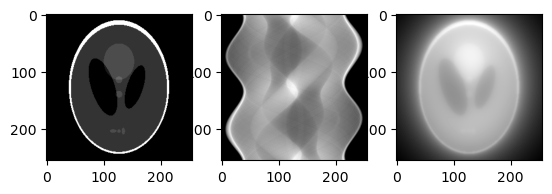

In [4]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x.cpu().numpy().squeeze(), cmap="gray")
plt.subplot(1,3,2)
plt.imshow(p.cpu().numpy().squeeze(), cmap="gray")
plt.subplot(1,3,3)
plt.imshow(b.cpu().numpy().squeeze(), cmap="gray")
plt.show()